In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [84]:
import msprime
msprime.__version__

'1.0.2'

In [85]:
def get_IDs(path):
    separated = path.split(os.sep)
    return tuple(separated[7:10])

In [86]:
names_dict = {}
names_dict['3pop_1'] = '100 admixed'
names_dict['3pop_2'] = '200 admixed'
names_dict['3pop_3'] = '400 admixed'
names_dict['3pop_4'] = 'smaller Ref (200)'
names_dict['3pop_5'] = 'larger Ref (800)'
names_dict['3pop_6'] = 'more sites (200K)'
names_dict['3pop_7'] = 'lower geno error (1e-5)'
names_dict['3pop_8'] = 'hiher geno error (4e-4)'
names_dict['3pop_9'] = 'fewer cores (4)'
names_dict['4pop_test'] = 'Four pops'

In [87]:
to_load_bench = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/benchmark/*.tsv')
to_load_bench += glob.glob('/home/kele/Documents/lai/lai-sim/results/OutOfAfrica_4J17/4pop_79/*/benchmark/*.tsv')

bench_dict = {}
for f in to_load_bench:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    df['method'] = f.split(os.sep)[-1].split('.')[0].split('_')[1]
    bench_dict[f] = df#.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
bench = pd.concat(bench_dict.values())
bench = bench.query("anal_id not in ['long_run', 'short_run']")

In [88]:
bench.head(3)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,model_name,sim_id,anal_id,method
0,4745.5672,1:19:05,37874.85,39646.42,10298.40,13361.91,24.66,171.05,274.10,1632.98,AmericanAdmixture_4B11,AA_42,3pop_3,mosaic
0,1259.9337,0:20:59,1697.77,36507.06,1698.22,1698.96,38.82,0.76,788.14,9932.18,AmericanAdmixture_4B11,AA_42,3pop_3,bmix
0,2050.2750,0:34:10,2066.14,9145.23,2088.71,2089.70,527.91,0.02,780.60,16001.36,AmericanAdmixture_4B11,AA_42,3pop_3,RFMix2


In [94]:
sns.set_context('notebook', font_scale= 1.4)

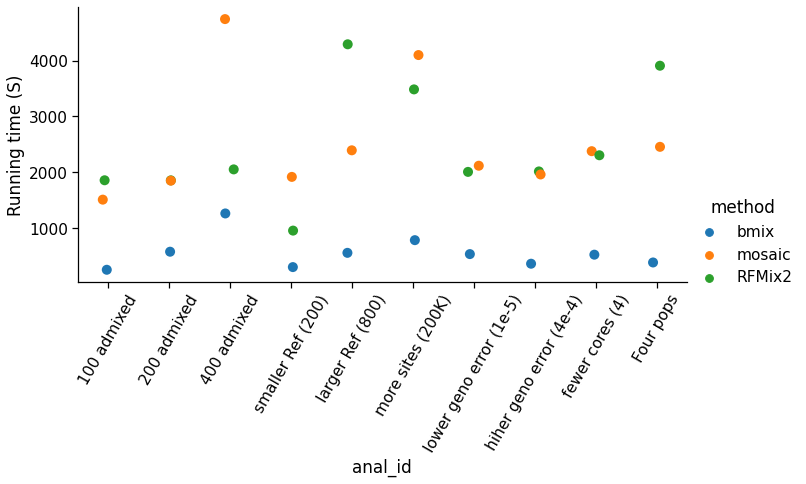

In [95]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
g = sns.catplot(
    x="anal_id",
    y="s",
    hue="method",
    #col='ancestry',
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    hue_order = ['bmix', 'mosaic', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_ylabels('Running time (S)')

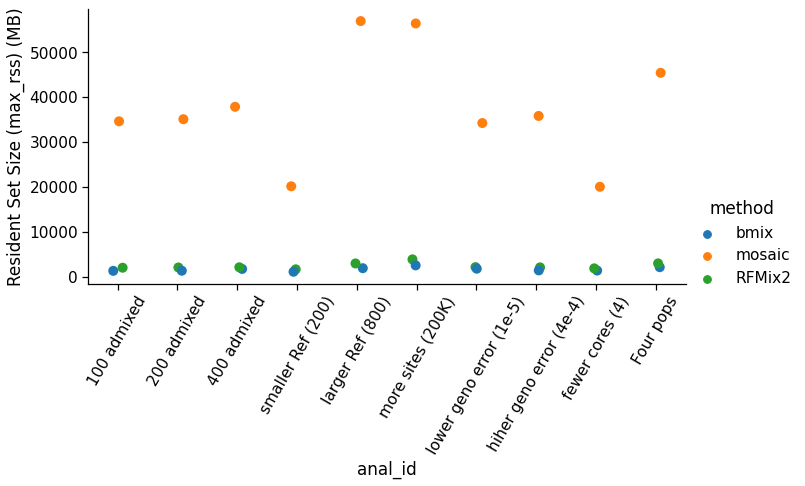

In [97]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
g = sns.catplot(
    x="anal_id",
    y="max_rss",
    hue="method",
    #col='ancestry',
    hue_order = ['bmix', 'mosaic', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_ylabels('Resident Set Size (max_rss) (MB)')

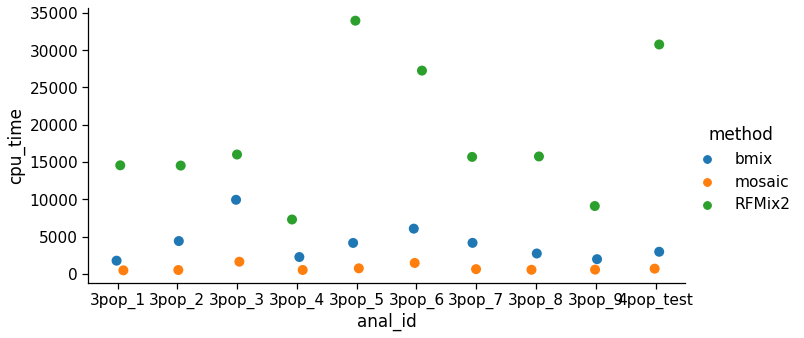

In [98]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
sns.catplot(
    x="anal_id",
    y="cpu_time",
    hue="method",
    #col='ancestry',
    hue_order = ['bmix', 'mosaic', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_ylabels('total cpu time (S)')